# Mia Scarpati #

## Machine Learning Stock Price Predictor ##

In [3]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import yfinance as yfin

2023-02-17 10:08:09.518620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Using LSTM deep learning neural networks

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL price, 1999-2022')

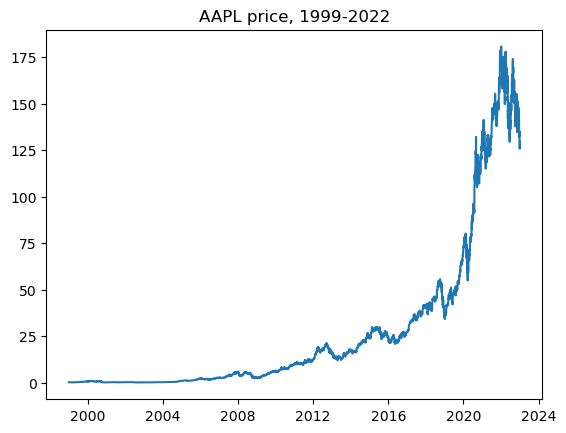

In [4]:
# Import data set
AAPL = yfin.download('AAPL', start='1999-01-01', end='2022-12-31')

# Plot data
plt.plot(AAPL.index, AAPL['Adj Close'])
plt.title("AAPL price, 1999-2022")

In [5]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
cols = ['Open','High','Low','Adj Close','Volume']
data = np.reshape(AAPL[cols], (len(AAPL[cols]), -1))
scaled_data = scaler.fit_transform(data)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size,:], scaled_data[train_size:,:]

# Format data for LSTM
def create_data(data, look_back):
    X, Y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])
        Y.append(data[i, 3])
    return np.array(X), np.array(Y)

inputsTrain, outputsTrain = create_data(train, 30)
inputsTest, outputsTest = create_data(test, 30)
    
inputsTrain.shape

(4801, 30, 5)

In [6]:
# Develop the model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(inputsTrain.shape[1], inputsTrain.shape[2]), recurrent_dropout=0.5),
    LSTM(units=64, return_sequences=False, recurrent_dropout=0.5),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 51,009
Trainable params: 51,009
Non-trainable params: 0
_________________________________________________________________


2023-02-17 10:09:11.303735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Train the model
model.fit(inputsTrain, outputsTrain, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
151/151 [==============================] - 9s 41ms/step - loss: 1.7012e-04
Epoch 2/10
151/151 [==============================] - 6s 42ms/step - loss: 1.7535e-05
Epoch 3/10
151/151 [==============================] - 6s 42ms/step - loss: 1.2663e-05
Epoch 4/10
151/151 [==============================] - 6s 41ms/step - loss: 1.0920e-05
Epoch 5/10
151/151 [==============================] - 6s 42ms/step - loss: 1.0480e-05
Epoch 6/10
151/151 [==============================] - 6s 41ms/step - loss: 1.0376e-05
Epoch 7/10
151/151 [==============================] - 6s 43ms/step - loss: 9.9866e-06
Epoch 8/10
151/151 [==============================] - 7s 43ms/step - loss: 1.1049e-05
Epoch 9/10
151/151 [==============================] - 6s 40ms/step - loss: 9.2749e-06
Epoch 10/10
151/151 [==============================] - 6s 41ms/step - loss: 9.7022e-06


37/37 [==============================] - 1s 10ms/step


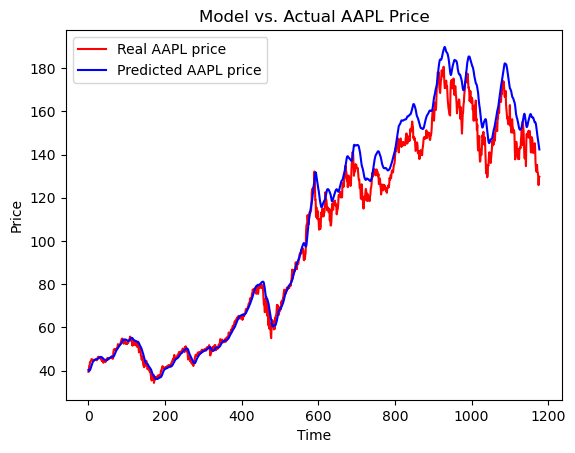

In [8]:
# Test our model
outputsPred = model.predict(inputsTest)
newScaler = MinMaxScaler(feature_range=(0,1))
adjCloseScaled = newScaler.fit_transform(data['Adj Close'].values.reshape(-1,1))
outputsPred = newScaler.inverse_transform(outputsPred)
outputsTest = newScaler.inverse_transform(outputsTest.reshape(-1,1))
plt.plot(outputsTest, color='red', label='Real AAPL price')
plt.plot(outputsPred, color='blue', label='Predicted AAPL price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Model vs. Actual AAPL Price")
plt.legend()
plt.show()